# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [46]:
import graphviz

In [13]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# Use uma string bruta (prefixo 'r') para evitar problemas de escape
boston = r'C:\Users\moona\Downloads\housing.csv'

# Leia o arquivo CSV e estabeleça a variável 'boston'
boston = pd.read_csv('housing.csv')

# Supondo que a última coluna seja o alvo (target)
X = boston.iloc[:, :-1]  # Todas as colunas exceto a última
y = boston.iloc[:, -1]   # Apenas a última coluna

# Verifique as primeiras linhas para garantir que o arquivo foi lido corretamente
print("Primeiras linhas de X:")
print(X.head())

print("\nPrimeiras linhas de y:")
print(y.head())

Primeiras linhas de X:
      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7

Primeiras linhas de y:
0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MDEV, dtype: float64


In [8]:
X.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [9]:
y.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MDEV, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [15]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MDEV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


Resposta: A base está no formato adequado para o sticklearn, pois há apenas floats e ints na base.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [29]:
boston.corr()

,RM,LSTAT,PTRATIO,MDEV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MDEV,0.697209,-0.760670,-0.519034,1.000000


Resposta: Tanto lstat (corr = -0.73) quando rm (corr = 0.69) parecem ter potenciais consideráveis.

### 3. Separe os dados em validação e teste

In [38]:
X = boston.drop(columns = ['MDEV'])
y = boston.MDEV

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [33]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

In [41]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [42]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1_train = regr_1.score(X_train, y_train)
mse2_train = regr_2.score(X_train, y_train)
mse1_test = regr_1.score(X_test, y_test)
mse2_test = regr_2.score(X_test, y_test)

template = "O MSE da árvore com profundidade = {0} é: {1:.2f}"

print('Para a base de treino:')
print(template.format(regr_1.get_depth(),mse1_train).replace(".",","))
print(template.format(regr_2.get_depth(),mse2_train).replace(".",","))
print('\nPara a base de teste:')
print(template.format(regr_1.get_depth(),mse1_test).replace(".",","))
print(template.format(regr_2.get_depth(),mse2_test).replace(".",","))

Para a base de treino:
O MSE da árvore com profundidade = 2 é: 0,73
O MSE da árvore com profundidade = 8 é: 0,96

Para a base de teste:
O MSE da árvore com profundidade = 2 é: 0,59
O MSE da árvore com profundidade = 8 é: 0,73


O R quadrado da árvore de profundidade 2 é 0,73
O R quadrado da árvore de profundidade 8 é 0,98

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Resposta: A árvore com profundidade "8" me parece a mais adequada, porque foi a que obteve o maior score com a base de teste.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [60]:
from sklearn.tree import DecisionTreeRegressor


clf2 = DecisionTreeRegressor()  
clf2.fit(X_train, y_train)  

DecisionTreeRegressor()

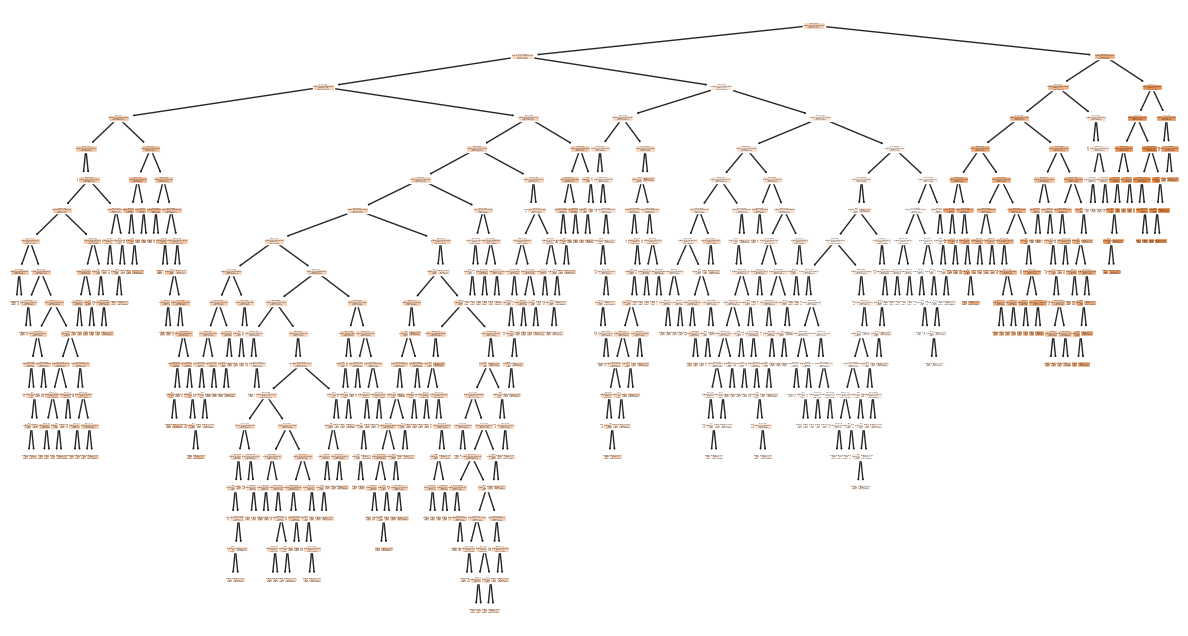

In [59]:
plt.rc('figure' , figsize = (15 , 8))

tree.plot_tree(clf2 , filled = True)

plt.show()

Resposta: A variável que me parece mais "importante" é a lstat, pois é possível observar que ela aparece quebrando a árvore algumas vezes nos primeiros nós.